# A2 Bias in data

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Select and Download Datasets

### Toxicity Dataset

The documentation and data files available are [wikimedia](https://meta.wikimedia.org/wiki/Research:Detox/Data_Release#Toxicity) and [figshare](https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Toxicity/4563973).

In [309]:
# TOXICITY ANNOTATIONS
toxicity_ann = pd.read_csv('Toxicity/toxicity_annotations.tsv', sep = '\t')

# TOXICITY ANNOTATED COMMENTS
toxicity_com = pd.read_csv('Toxicity/toxicity_annotated_comments.tsv', sep = '\t')

# TOXICITY WORKER DEMOGRAPHICS
toxicity_dem = pd.read_csv('Toxicity/toxicity_worker_demographics.tsv', sep = '\t')

In [310]:
display(toxicity_ann)
# type(toxicity_ann.toxicity_score[0])

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0
...,...,...,...,...
1598284,699897151.0,1550,0,0.0
1598285,699897151.0,1025,0,1.0
1598286,699897151.0,648,0,1.0
1598287,699897151.0,379,0,0.0


In [311]:
display(toxicity_com)

,rev_id,comment,year,logged_in,ns,sample,split
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train
1,4216.0,`NEWLINE_TOKENNEWLINE_TOKEN:Clarification for ...,2002,True,user,random,train
2,8953.0,Elected or Electoral? JHK,2002,False,article,random,test
3,26547.0,`This is such a fun entry. DevotchkaNEWLINE_...,2002,True,article,random,train
4,28959.0,Please relate the ozone hole to increases in c...,2002,True,article,random,test
...,...,...,...,...,...,...,...
159681,699848324.0,`NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENThese ...,2016,True,article,blocked,train
159682,699851288.0,NEWLINE_TOKENNEWLINE_TOKENThe Institute for Hi...,2016,True,article,blocked,test
159683,699857133.0,NEWLINE_TOKEN:The way you're trying to describ...,2016,True,article,blocked,dev
159684,699891012.0,NEWLINE_TOKENNEWLINE_TOKEN== Warning ==NEWLINE...,2016,True,user,blocked,train


In [312]:
display(toxicity_dem)

,worker_id,gender,english_first_language,age_group,education
0,85,female,0,18-30,bachelors
1,1617,female,0,45-60,bachelors
2,1394,female,0,NaN,bachelors
3,311,male,0,30-45,bachelors
4,1980,male,0,45-60,masters
...,...,...,...,...,...
3586,3189,female,0,18-30,bachelors
3587,1105,female,0,18-30,bachelors
3588,2192,female,1,Under 18,hs
3589,2692,female,0,30-45,hs


We need to merge the three tables to get full data. "rev_id" is stored as a float and needed to be changed to integer. 

In [313]:
toxicity_worker = pd.merge(toxicity_ann, toxicity_dem, on='worker_id')
toxicity_worker.rev_id = toxicity_worker.rev_id.astype('int')

# toxicity_merged = pd.merge(toxicity_worker, toxicity_com, on='rev_id')
# toxicity_merged.rev_id = toxicity_merged.rev_id.astype('int')
# toxicity_merged

Check for null values and remove if needed.

In [314]:
toxicity_worker.isnull().sum()

rev_id                        0
worker_id                     0
toxicity                      0
toxicity_score                0
gender                        0
english_first_language        0
age_group                 29314
education                     0
dtype: int64

There are 29314 rows missing age_group data, so I will just remove them.

In [315]:
toxicity_worker = toxicity_worker.dropna()
toxicity_worker

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
0,2232,723,0,0.0,female,0,30-45,bachelors
1,37346,723,0,0.0,female,0,30-45,bachelors
2,227181,723,0,0.0,female,0,30-45,bachelors
3,2810755,723,0,0.0,female,0,30-45,bachelors
4,7270696,723,0,0.0,female,0,30-45,bachelors
...,...,...,...,...,...,...,...,...
1346950,486196463,3423,0,0.0,male,1,18-30,bachelors
1346951,495568746,3423,1,-1.0,male,1,18-30,bachelors
1346952,522019023,3423,1,-2.0,male,1,18-30,bachelors
1346953,561277725,3423,0,1.0,male,1,18-30,bachelors


### Personal Attacks Dataset

The documentation and data files available are [wikimedia](https://meta.wikimedia.org/wiki/Research:Detox/Data_Release#Personal_Attacks) and [figshare](https://figshare.com/articles/Wikipedia_Talk_Labels_Personal_Attacks/4054689).

In [316]:
# ATTACK ANNOTATIONS
attack_ann = pd.read_csv('Attack/attack_annotations.tsv', sep = '\t')

# ATTACK ANNOTATED COMMENTS
attack_com = pd.read_csv('Attack/attack_annotated_comments.tsv', sep = '\t')

# ATTACK WORKER DEMOGRAPHICS
attack_dem = pd.read_csv('Attack/attack_worker_demographics.tsv', sep = '\t')

In [317]:
display(attack_ann)
display(attack_com)
display(attack_dem)

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
0,37675,1362,0.0,0.0,0.0,0.0,0.0
1,37675,2408,0.0,0.0,0.0,0.0,0.0
2,37675,1493,0.0,0.0,0.0,0.0,0.0
3,37675,1439,0.0,0.0,0.0,0.0,0.0
4,37675,170,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1365212,699897151,628,0.0,0.0,0.0,0.0,0.0
1365213,699897151,15,0.0,0.0,0.0,0.0,0.0
1365214,699897151,57,0.0,0.0,0.0,0.0,0.0
1365215,699897151,1815,0.0,0.0,0.0,0.0,0.0


,rev_id,comment,year,logged_in,ns,sample,split
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train
...,...,...,...,...,...,...,...
115859,699848324,`NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENThese ...,2016,True,article,blocked,train
115860,699851288,NEWLINE_TOKENNEWLINE_TOKENThe Institute for Hi...,2016,True,article,blocked,test
115861,699857133,NEWLINE_TOKEN:The way you're trying to describ...,2016,True,article,blocked,train
115862,699891012,NEWLINE_TOKENNEWLINE_TOKEN== Warning ==NEWLINE...,2016,True,user,blocked,dev


,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs
...,...,...,...,...,...
2185,1442,male,0,18-30,hs
2186,529,female,0,30-45,hs
2187,2036,female,0,18-30,masters
2188,393,female,0,18-30,masters


In [318]:
attack_worker = pd.merge(attack_ann, attack_dem, on='worker_id')
attack_worker.rev_id = attack_worker.rev_id.astype('int')

# attack_merged = pd.merge(attack_worker, attack_com, on='rev_id')
# attack_merged.rev_id = attack_merged.rev_id.astype('int')
# attack_worker

In [319]:
attack_worker.isnull().sum()

rev_id                        0
worker_id                     0
quoting_attack                0
recipient_attack              0
third_party_attack            0
other_attack                  0
attack                        0
gender                        0
english_first_language        0
age_group                 12007
education                     0
dtype: int64

In [320]:
attack_worker = attack_worker.dropna()
attack_worker

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack,gender,english_first_language,age_group,education
0,37675,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
1,3202092,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
2,4745553,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
3,4855563,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
4,8350378,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
...,...,...,...,...,...,...,...,...,...,...,...
855509,281960519,3964,0.0,0.0,1.0,0.0,1.0,male,0,Under 18,some
855510,289741535,3964,0.0,0.0,1.0,0.0,1.0,male,0,Under 18,some
855511,392852210,3964,0.0,0.0,0.0,0.0,0.0,male,0,Under 18,some
855512,538094319,3964,0.0,0.0,0.0,0.0,0.0,male,0,Under 18,some


## Step 2: Perform Analysis

1. Analyze the demographic information about the Crowdflower workers that is available in the toxicity dataset.

In [321]:
'''
This function prints the input dataframe, create and save a bar chart with percentages annotated above each bar. 
'''
def barplot(df, title):
    # print()
    plt.figure(figsize=(15,10))
    total = df.values.sum()
    display(df)
    ax = df.plot(kind = 'bar', rot = 0)
    for p in ax.patches:
        ax.annotate(str(round(p.get_height()/total*100, 2))+'%', xy=(p.get_x()+0.25, p.get_height()),  ha='center', va='center', fontsize = 12)
    # df.plot.bar()
    plt.gcf().text(0.2, 0, 'Annotated numbers represent the percentages of each category.', fontsize=14)
    plt.title(title)
    plt.ylabel('Counts')
    plt.savefig('image/'+title+'.jpg')
    plt.show()

Plot number of labelers by gender, age group, education level and languages.

male      2327
female    1263
other        1
Name: gender, dtype: int64

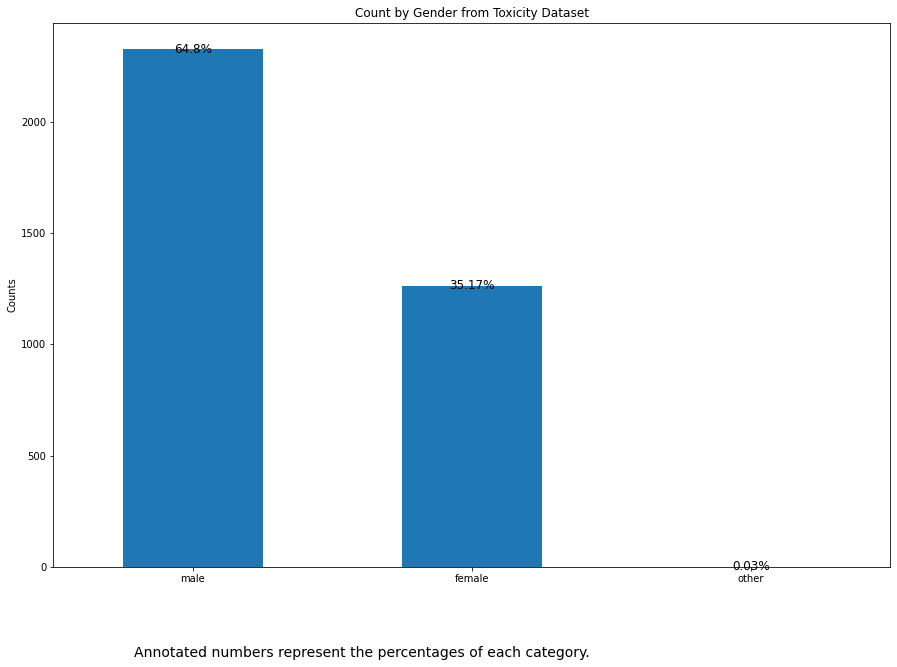

18-30       1862
30-45       1247
45-60        296
Under 18      79
Over 60       30
Name: age_group, dtype: int64

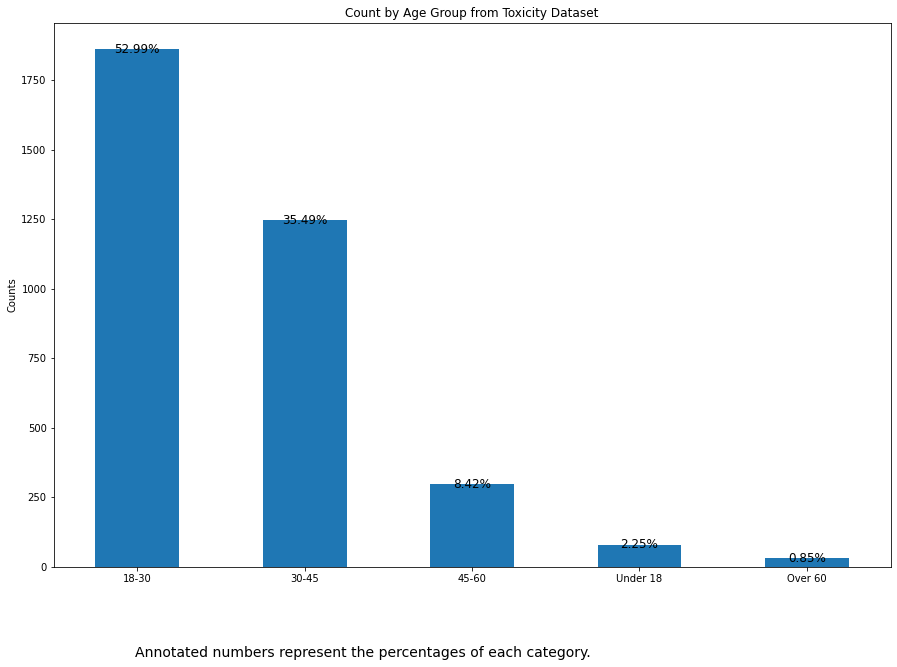

bachelors       1441
hs              1026
masters          546
professional     441
some              93
doctorate         41
none               3
Name: education, dtype: int64

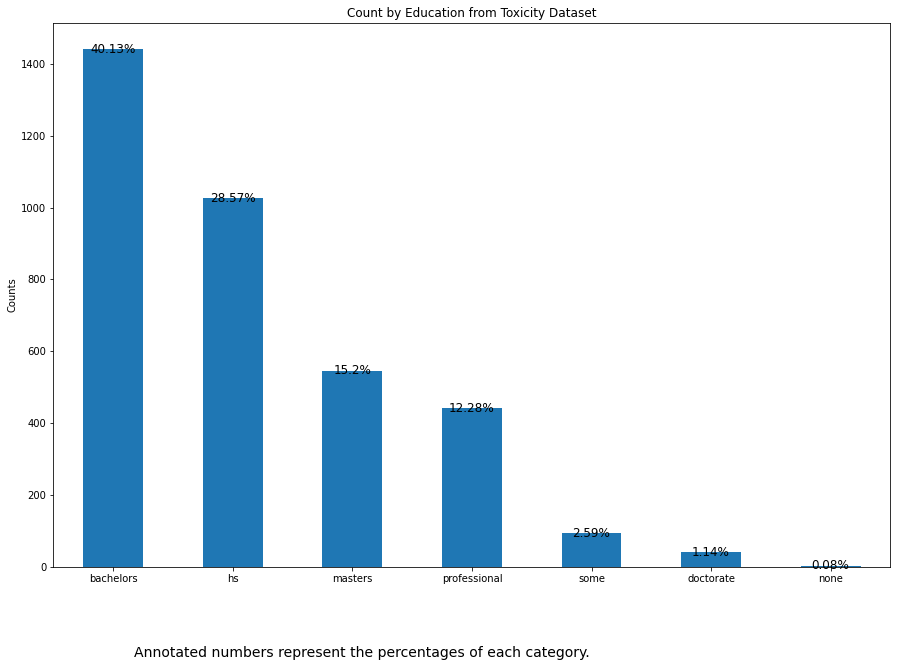

0    2925
1     666
Name: english_first_language, dtype: int64

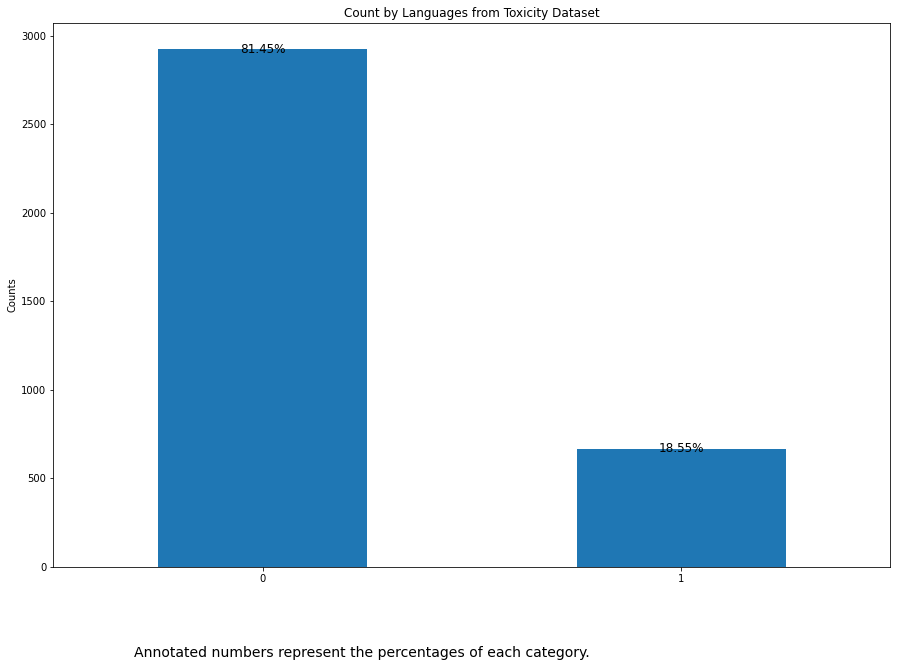

In [322]:
dataset = ' from Toxicity Dataset'
barplot(toxicity_dem.gender.value_counts(), 'Count by Gender'+dataset)
barplot(toxicity_dem.age_group.value_counts(), 'Count by Age Group'+dataset)
barplot(toxicity_dem.education.value_counts(), 'Count by Education'+dataset)
barplot(toxicity_dem.english_first_language.value_counts(), 'Count by Languages'+dataset)
# toxicity_worker.age_group.value_counts().plot.bar()

From the bar charts above, we can see that the distribution of worker demographics is very unbalanced in the following four aspects. 

- Age

    The vast majority of the data was labeled by people ages 18 - 45. Different generations have different lived experiences which could affect their decision in what constitutes a toxic comment. The data is biased because there is less representation for people who are older than 45 or younger than 18. 

- Gender

    There are about twice as many male workers as female labelers and there is almost no information about non-binary people. The data is not inclusive and does not represent the actual population demographics in the US. The misrepresentation of the population can add bias because men, women, and non-binary people can have different experiences because of their gender identity. People with different gender identities may have different labeling behavior.

- Education 

    Over half of the labelers have bachelor's degrees but there is little information about those who have lower than high school and doctorate's degrees. Besides, the definition of "some" education is not clear for me, so it may also confuse the labelers while classifying themselves.  

- Languages
 
    Similar to all the problems listed above, the number of English native speakers is over 4 times compared to those whose first language is not English in this sample. The data considers all the non-English languages as one big group but many languages have various cultural contexts such as Chinese and French. 


2. Analyze the demographic information about the Crowdflower workers that is available in the personal attack dataset and compare the results with those from the toxicity dataset.

male      1349
female     840
other        1
Name: gender, dtype: int64

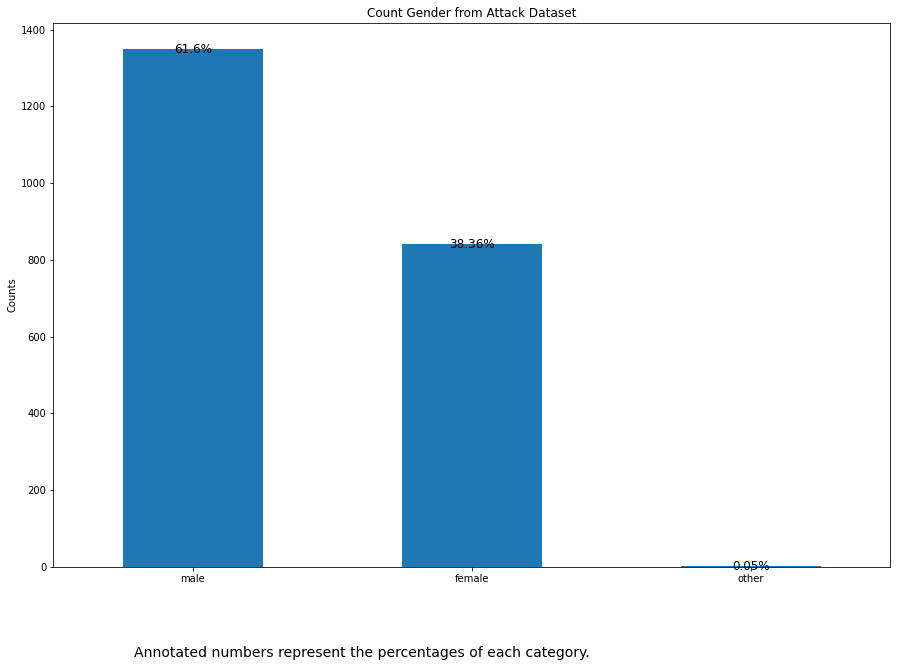

18-30       1049
30-45        831
45-60        218
Under 18      37
Over 60       20
Name: age_group, dtype: int64

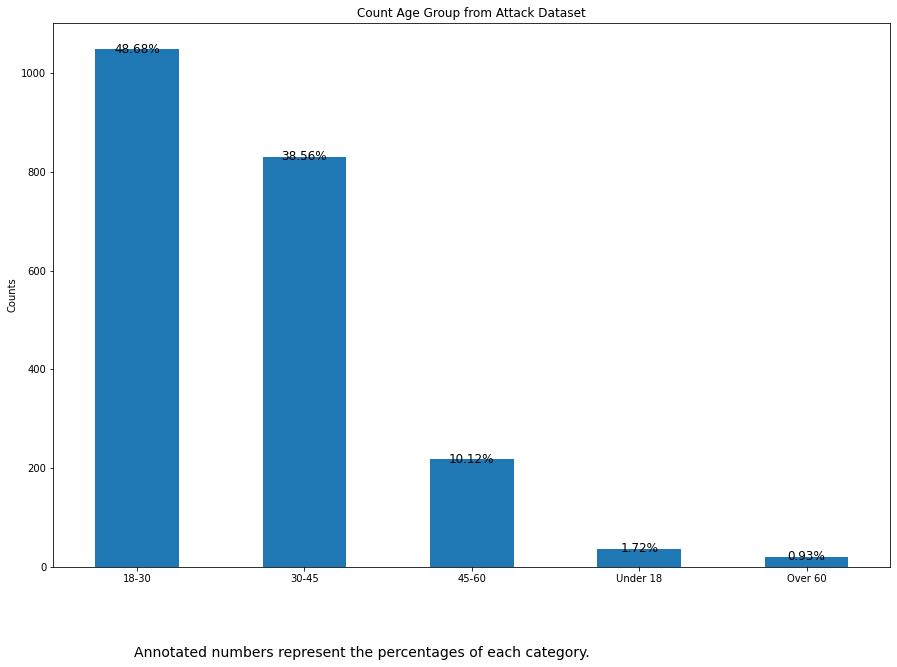

bachelors       862
hs              631
masters         385
professional    243
some             48
doctorate        20
none              1
Name: education, dtype: int64

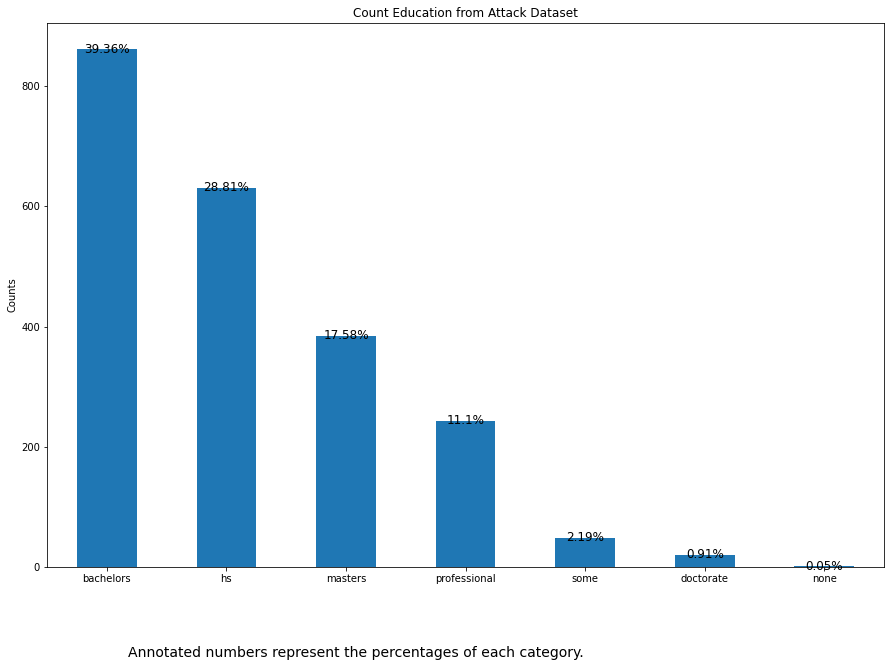

0    1788
1     402
Name: english_first_language, dtype: int64

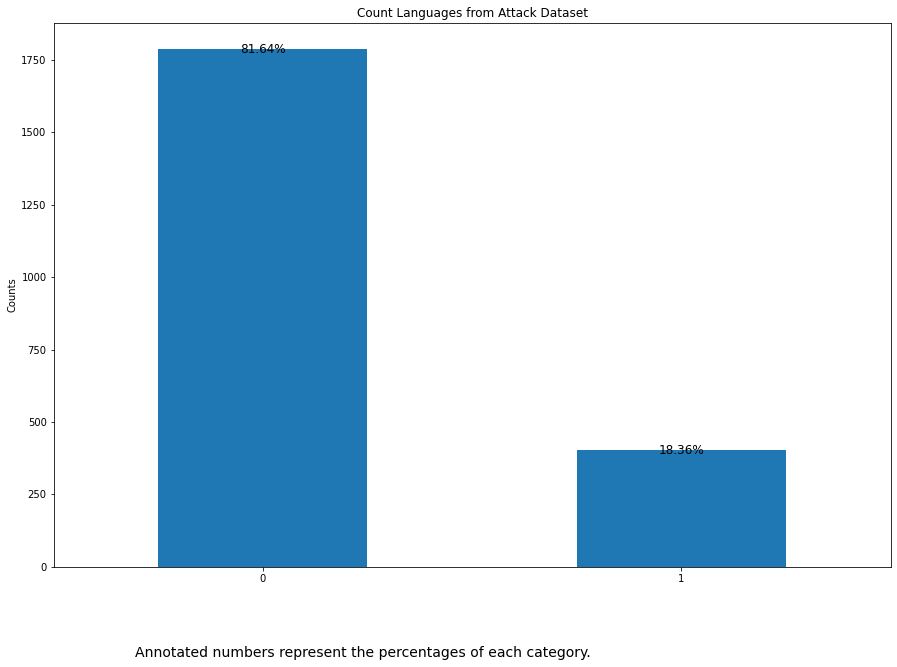

In [323]:
dataset = ' from Attack Dataset'
barplot(attack_dem.gender.value_counts(), 'Count Gender'+dataset)
barplot(attack_dem.age_group.value_counts(), 'Count Age Group'+dataset)
barplot(attack_dem.education.value_counts(), 'Count Education'+dataset)
barplot(attack_dem.english_first_language.value_counts(), 'Count Languages'+dataset)

From the summary charts of worker demographics in the personal attacks dataset above, the numbers are slightly different between the demographics between the toxicity and attack dataset but they share almost the same general trend.  

3. Analyze and compare the relationship between gender and the toxicity score/attack score for the two datasets.

There is only one person marked as "other" as gender in both datasets so I will only compare "male" and "female" for this part. 

In [324]:
pd.pivot_table(toxicity_worker[toxicity_worker.gender != 'other'], values =['toxicity'], index=['toxicity_score'], columns=['gender'], aggfunc='count')

toxicity        
gender           female    male
toxicity_score                 
-2.0              13787   21564
-1.0              56300  100316
 0.0             217921  419032
 1.0             151632  317528
 2.0               6465   12738

,toxicity_score
gender,
female,0.180872
male,0.229069


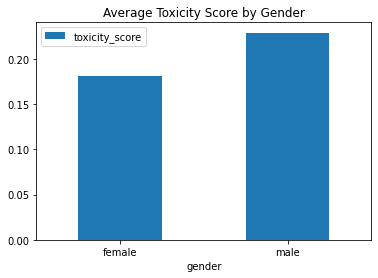

In [325]:
tox_pivot = pd.pivot_table(toxicity_worker[toxicity_worker.gender != 'other'], values='toxicity_score', index=['gender'])
display(tox_pivot)
tox_pivot.plot(kind = 'bar', rot = 0)
plt.title('Average Toxicity Score by Gender')
plt.savefig('image/Average Toxicity.jpg')
plt.show()

The number of males is about twice the number of females across the board of the toxicity score.  I plot the comparison between male and female based on the mean of toxicity score. We can see a similar result that male on average has more toxic ratings on Wikipedia comments than female. 

gender,female,male
attack,,
False,252852,451989
True,53126,85457


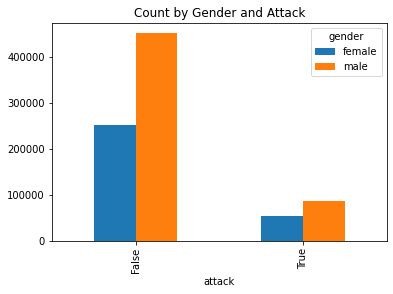

In [326]:
attack_worker_new = attack_worker[attack_worker.gender != 'other']
attack_worker_new['count'] = 1
attack_worker_new.attack = attack_worker_new.attack.astype(bool)
att_pivot = attack_worker_new.pivot_table(columns = 'gender', values= 'count', index=['attack'], aggfunc = 'sum')
display(att_pivot)
att_pivot.plot(kind = 'bar')
plt.title('Count by Gender and Attack')
plt.savefig('image/Count by Gender and Attack.jpg')
plt.show()

In [327]:
attack_worker_new.pivot_table(columns = 'gender', values= 'attack', aggfunc = 'mean')

gender,female,male
attack,0.173627,0.159006


For both men and women, there are more people labeling "attack" than "non-attack". On average, females have a higher chance of labeling a comment as "attack" than men, which is an opposite result compared to the relationship between gender and toxicity score. 

## Step 3: Further Implications

All the demo applications discussed below are listed in the “[Perspective Hacks](https://github.com/conversationai/perspectiveapi/wiki/perspective-hacks)” gallery.

1. Which, if any, of these demo applications would you expect the Perspective API—or any model trained on the Wikipedia Talk corpus—to perform well in? Why?

    I expect models trained on the Wikipedia Talk corpus to perform well in the WikiDetox application, which is to visualize toxic comments on Wikipedia. The context information would be similar, both the comments from the toxicity dataset and those used for this application are from Wikimedia. The Perspective API is highly related to the information that this app wants to show to the Wikipedians.
    
2. Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?

    Hot Topics is an example that I don't think the Perspective API would work well in. The description of this application mentions that it uses a data set of toxicity per category to compute the average toxicity score for an article. However, the raw data from the Wikipedia Talk corpus does not classify the comments, so I concern the relevance of their categories and toxicity. Besides, the application will be used on any articles, the toxicity score for articles that are not related to Wikipedia comments might not be accurate. 

3. What are some kinds of hostile speech that would be difficult to accurately detect using the approach used to train the Perspective API models? 

    Hostile speech in non-English languages would be hard to accurately detect using models trained on the Perspective API where all the comments are in English. In addition, the detection of toxic recent social media posts could also be a huge challenge for the following two reasons. The comment dates are from 2002 to 2016 but the trending words on the Internet changes so fast that data from the Perspective API may be outdated in this case. The comments are from the Wikipedia user page and article page, which may not be representative enough for social media posts. 
